(541909, 8)
Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')
            Quantity                    InvoiceDate      UnitPrice  \
count  397884.000000                         397884  397884.000000   
mean       12.988238  2011-07-10 23:41:23.511023360       3.116488   
min         1.000000            2010-12-01 08:26:00       0.001000   
25%         2.000000            2011-04-07 11:12:00       1.250000   
50%         6.000000            2011-07-31 14:39:00       1.950000   
75%        12.000000            2011-10-20 14:33:00       3.750000   
max     80995.000000            2011-12-09 12:50:00    8142.750000   
std       179.331775                            NaN      22.097877   

          CustomerID     TotalPrice  
count  397884.000000  397884.000000  
mean    15294.423453      22.397000  
min     12346.000000       0.001000  
25%     13969.000000       4.680000  
50%     15159.000000    

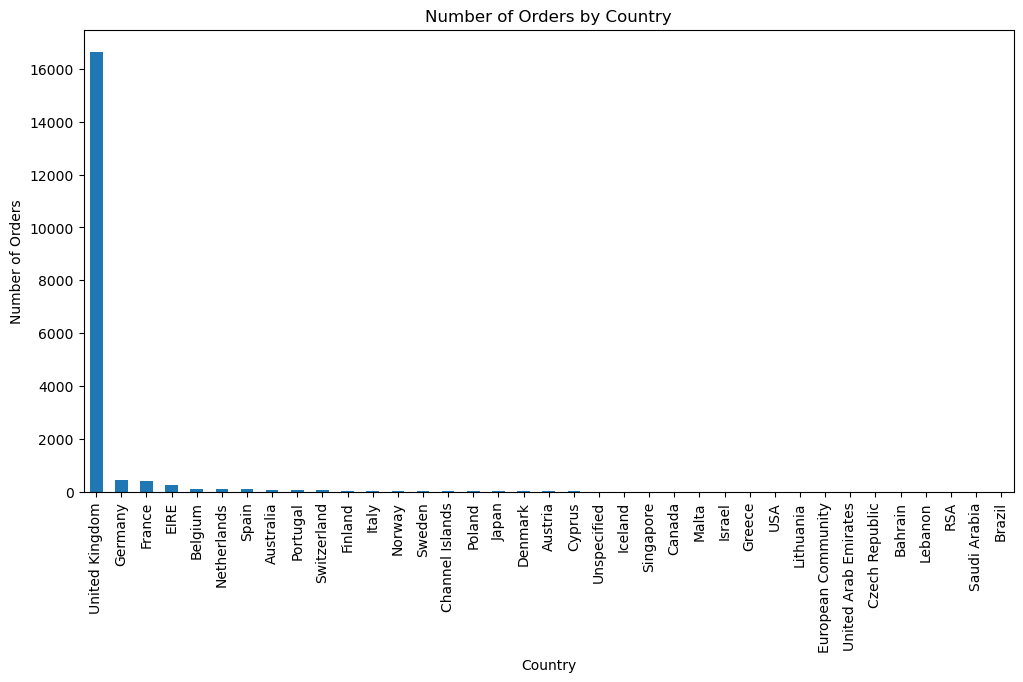

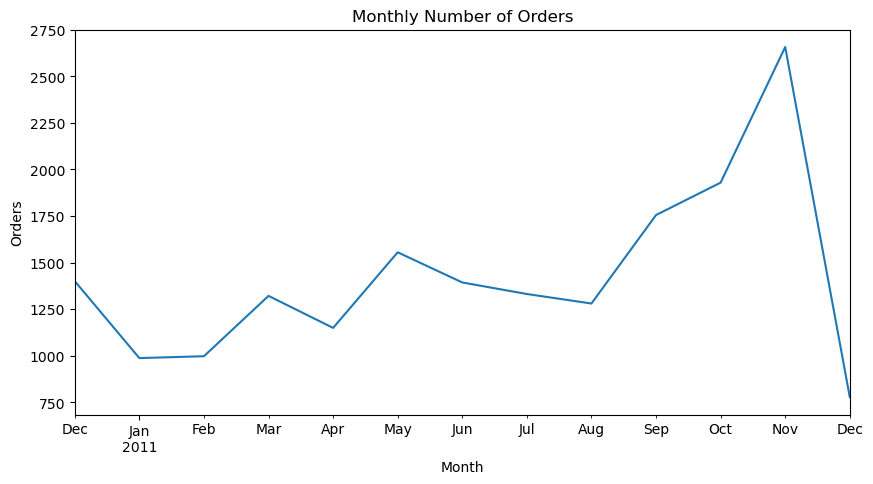

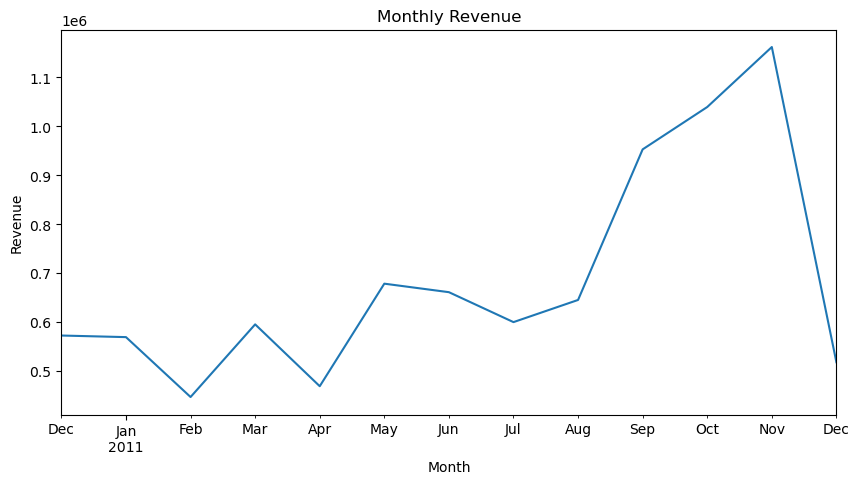

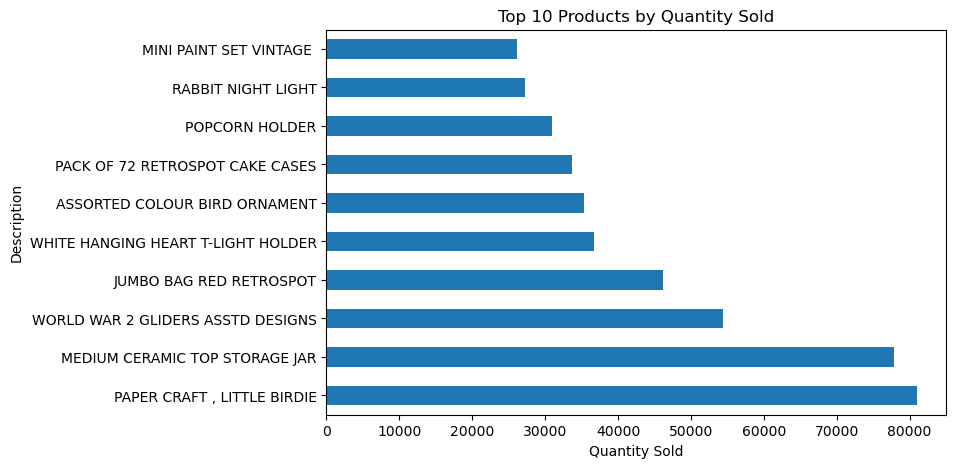

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_excel("Downloads/Online Retail.xlsx")
print(df.shape)
print(df.columns)
df.head()

# Clean data
df = df.dropna(subset=['CustomerID'])
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df['Month'] = df['InvoiceDate'].dt.to_period('M')

# Exploratory analysis
print(df.describe())
print(df['Country'].value_counts())

# Plots
plt.figure(figsize=(12,6))
df.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False).plot(kind='bar')
plt.title('Number of Orders by Country')
plt.ylabel('Number of Orders')
plt.show()

plt.figure(figsize=(10,5))
df.groupby('Month')['InvoiceNo'].nunique().plot()
plt.title('Monthly Number of Orders')
plt.ylabel('Orders')
plt.show()

plt.figure(figsize=(10,5))
df.groupby('Month')['TotalPrice'].sum().plot()
plt.title('Monthly Revenue')
plt.ylabel('Revenue')
plt.show()

# Top products
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,5))
top_products.plot(kind='barh')
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Quantity Sold')
plt.show()

# Export cleaned data
df.to_csv("Downloads/cleaned_online_retail.csv", index=False)
